In [9]:
import requests
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm


In [5]:
def generate_beige_book_urls(start_date):
    """
    Generate Beige Book URLs starting from a specific date
    The URL format is: /beige-book-reports/YYYY/YYYY-MM-su
    """
    urls = []
    base_url = "https://www.minneapolisfed.org/beige-book-reports"

    for year in range(2004,2025):
        for month in range(1, 13):
            url = f"{base_url}/{year}/{year}-{month:02d}-su"
            urls.append({"url": url, "date": str(year) + "-" + str(month)})

    return urls


def check_url_validity(url):
    """Check if the URL returns a valid response"""
    try:
        response = requests.get(url)
        return response.status_code == 200
    except:
        return False


# Start from November 2024
start_date = datetime(2024, 11, 1)

# Generate potential URLs
urls = generate_beige_book_urls(start_date)

# Filter valid URLs
valid_urls = []
for url_data in urls:
    if check_url_validity(url_data["url"]):
        valid_urls.append(url_data)
        print(f"Valid URL: {url_data['url']}")

# Create a DataFrame with the results
df = pd.DataFrame(valid_urls)

# Display results
print(f"Found {len(valid_urls)} valid Beige Book reports")
print("\nValid URLs:")
print(df)

# Optionally save to CSV
df.to_csv("beige_book_urls.csv", index=False)

Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-01-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-03-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-04-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-06-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-07-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-09-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-10-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2004/2004-12-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2005/2005-01-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2005/2005-03-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2005/2005-04-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2005/2005-06-su
Valid URL: https://www.minneapolisfed.org/beige-book-reports/2005/2005-07-su

In [7]:

beige_book_urls = pd.read_csv("beige_book_urls.csv")

print(beige_book_urls)


                                                   url     date
0    https://www.minneapolisfed.org/beige-book-repo...   2004-1
1    https://www.minneapolisfed.org/beige-book-repo...   2004-3
2    https://www.minneapolisfed.org/beige-book-repo...   2004-4
3    https://www.minneapolisfed.org/beige-book-repo...   2004-6
4    https://www.minneapolisfed.org/beige-book-repo...   2004-7
..                                                 ...      ...
160  https://www.minneapolisfed.org/beige-book-repo...   2024-4
161  https://www.minneapolisfed.org/beige-book-repo...   2024-5
162  https://www.minneapolisfed.org/beige-book-repo...   2024-7
163  https://www.minneapolisfed.org/beige-book-repo...   2024-9
164  https://www.minneapolisfed.org/beige-book-repo...  2024-10

[165 rows x 2 columns]


In [25]:
results = []
for index, row in beige_book_urls.iterrows():
    url = row["url"]
    soup = BeautifulSoup(requests.get(url).text, "html.parser")
    labor_market_div = soup.find("h1", string="Beige Book: National Summary")
    # Find the next sibling
    next_sibling = labor_market_div.find_parent("div")
    results.append({"url": url, "next_sibling": next_sibling.text, "date": row["date"]})

results_df = pd.DataFrame(results)
print(results_df)

results_df.to_csv("beige_book_results.csv", index=False)

                                                   url  \
0    https://www.minneapolisfed.org/beige-book-repo...   
1    https://www.minneapolisfed.org/beige-book-repo...   
2    https://www.minneapolisfed.org/beige-book-repo...   
3    https://www.minneapolisfed.org/beige-book-repo...   
4    https://www.minneapolisfed.org/beige-book-repo...   
..                                                 ...   
160  https://www.minneapolisfed.org/beige-book-repo...   
161  https://www.minneapolisfed.org/beige-book-repo...   
162  https://www.minneapolisfed.org/beige-book-repo...   
163  https://www.minneapolisfed.org/beige-book-repo...   
164  https://www.minneapolisfed.org/beige-book-repo...   

                                          next_sibling     date  
0    \n‹ Back to Archive Search\nBeige Book: Nation...   2004-1  
1    \n‹ Back to Archive Search\nBeige Book: Nation...   2004-3  
2    \n‹ Back to Archive Search\nBeige Book: Nation...   2004-4  
3    \n‹ Back to Archive Search\nBeige 

In [5]:
# Find the div with text "Labor Market"
labor_market_div = soup.find("h1", string="Beige Book: National Summary")
# Find the next sibling
next_sibling = labor_market_div.find_parent("div")

print(next_sibling)

NameError: name 'soup' is not defined

In [4]:
results_df = pd.read_csv("beige_book_results.csv")

In [6]:
import os
import google.generativeai as genai
import json
from google.ai.generativelanguage_v1beta.types import content

genai.configure(api_key='')

c:\Users\Olek\Documents\GitHub\Quant-Research-Notebooks\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 40,
    "max_output_tokens": 8192,
    "response_schema": content.Schema(
        type=content.Type.OBJECT,
        enum=[],
        required=[
            "extract",
            "hiring market",
            "consumer spending",
            "economic growth",
            "material prices",
        ],
        properties={
            "extract": content.Schema(
                type=content.Type.STRING,
            ),
            "hiring market": content.Schema(
                type=content.Type.NUMBER,
            ),
            "consumer spending": content.Schema(
                type=content.Type.NUMBER,
            ),
            "economic growth": content.Schema(
                type=content.Type.NUMBER,
            ),
            "material prices": content.Schema(
                type=content.Type.NUMBER,
            ),
        },
    ),
    "response_mime_type": "application/json",
}

model = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config=generation_config,
    system_instruction="Extract the Beige Book National Summary from this html code. Provide insights with grades from 1(really bad) to 10(really good) it statements can be considered regarding the following impacts :\nhiring market, consumer spending, economic growth, material prices",
)

for index, row in tqdm(results_df.iterrows()):
    response = model.generate_content(row["next_sibling"])
    try:
        parsed_response = json.loads(response.text)
        results_df.at[index, "summary"] = parsed_response
        results_df.at[index, "hiring market"] = parsed_response["hiring market"]
        results_df.at[index, "consumer spending"] = parsed_response["consumer spending"]
        results_df.at[index, "economic growth"] = parsed_response["economic growth"]
        results_df.at[index, "material prices"] = parsed_response["material prices"]
    except:
        print(f"Error parsing response for URL: {row['url']}")

# drop next_sibling column
results_df = results_df.drop(columns=["next_sibling"])
results_df.to_csv("beige_book_results_LLM.csv", index=False)


165it [08:57,  3.26s/it]


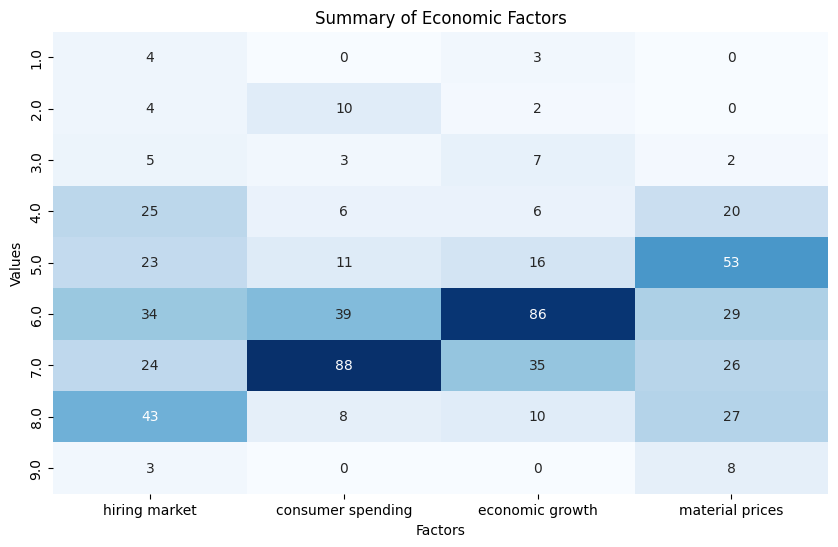

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming it's saved to a CSV file)
results_df = pd.read_csv("beige_book_results_LLM.csv")

# Select relevant columns for visualization
columns_to_plot = [
    "hiring market",
    "consumer spending",
    "economic growth",
    "material prices",
]

# Check for NaN values and handle them
results_df[columns_to_plot] = results_df[columns_to_plot].fillna("No Data")

# Count the occurrences of each category for visualization
summary_counts = results_df[columns_to_plot].apply(pd.Series.value_counts).fillna(0)

# Plot a heatmap for better comparison across categories
plt.figure(figsize=(10, 6))
sns.heatmap(summary_counts, annot=True, fmt=".0f", cmap="Blues", cbar=False)
plt.title("Summary of Economic Factors")
plt.xlabel("Factors")
plt.ylabel("Values")
plt.show()

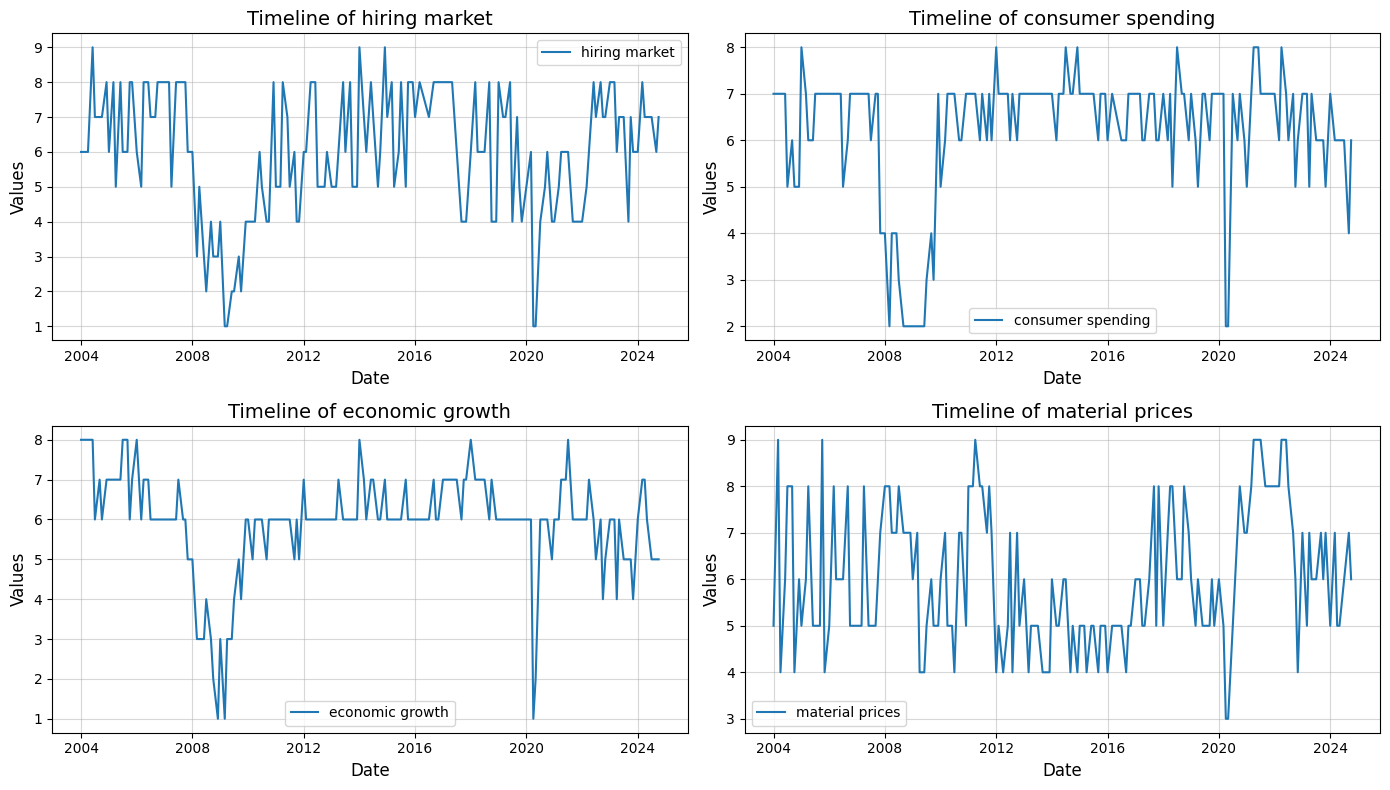

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
results_df = pd.read_csv("beige_book_results_LLM.csv")

# Convert the 'created_at' column to a datetime format
results_df["date"] = pd.to_datetime(results_df["date"])

# Set the 'created_at' column as the index
results_df = results_df.sort_values("date").set_index("date")

# Plot timeline for each key factor in separate subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

columns_to_plot = [
    "hiring market",
    "consumer spending",
    "economic growth",
    "material prices",
]

for i, column in enumerate(columns_to_plot):
    axs[i // 2, i % 2].plot(results_df.index, results_df[column], label=column)
    axs[i // 2, i % 2].set_title(f"Timeline of {column}", fontsize=14)
    axs[i // 2, i % 2].set_xlabel("Date", fontsize=12)
    axs[i // 2, i % 2].set_ylabel("Values", fontsize=12)
    axs[i // 2, i % 2].legend(fontsize=10)
    axs[i // 2, i % 2].grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import yfinance as yf

# Step 1: Load the dataset
file_path = "beige_book_results_LLM.csv"
data = pd.read_csv(file_path)

# Step 2: Download S&P 500 historical data
sp500_data = yf.download("^GSPC", start="2004-01-01", end="2024-01-01")
sp500_data["Return"] = (
    sp500_data["Adj Close"].pct_change().shift(-1)
)  # Next day's return
sp500_data = sp500_data.reset_index()[["Date", "Return"]]  # Keep only relevant columns
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"]).dt.to_period("M")

# Step 3: Merge datasets
# Convert 'date' column in the Beige Book data to datetime and then to monthly periods
data["date"] = pd.to_datetime(data["date"], errors="coerce").dt.to_period("M")

# Ensure 'Date' in S&P 500 data is also in monthly periods
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"]).dt.to_period("M")

# Perform the merge
merged_data = pd.merge(data, sp500_data, left_on="date", right_on="Date", how="inner")

# Drop unnecessary columns
merged_data = merged_data.drop(columns=["url", "summary", "date", "Date"])

# Step 4: Create a target variable
merged_data["Target"] = (merged_data["Return"] > 0).astype(
    int
)  # 1 if positive return, else 0
merged_data = merged_data.drop(columns=["Return"])  # Drop the return column

# Step 5: Split into features and target
X = merged_data[
    ["hiring market", "consumer spending", "economic growth", "material prices"]
].fillna(0)
y = merged_data["Target"]

# Step 6: Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Step 7: Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Step 8: Evaluate the model
y_val_pred = rf_clf.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

y_test_pred = rf_clf.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

[*********************100%***********************]  1 of 1 completed

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead